# Multi-colored Titles

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(91)

In [2]:
mpl.__version__

'3.2.2'

In [3]:
!python -V

Python 3.7.12


# Title Function

In [4]:
def color_title(labels, colors, textprops ={'size':'large'}, ax = None, y = 1.013,
               precision = 10**-2):
     
    "Creates a centered title with multiple colors. Don't change axes limits afterwards."
        
    if ax == None:
        ax = plt.gca()
        
    plt.gcf().canvas.draw()
    transform = ax.transAxes # use axes coords
    
    # initial params
    xT = 0 # where the text ends in x-axis coords
    shift = 0 # where the text starts
    
    # for text objects
    text = dict()

    while (np.abs(shift - (1-xT)) > precision) and (shift <= xT) :         
        x_pos = shift 
        
        for label, col in zip(labels, colors):

            try:
                text[label].remove()
            except KeyError:
                pass
            
            text[label] = ax.text(x_pos, y, label, 
                        transform = transform, 
                        ha = 'left',
                        color = col,
                        **textprops)
            
            x_pos = text[label].get_window_extent()\
                   .transformed(transform.inverted()).x1
            
        xT = x_pos # where all text ends
        
        shift += precision/2 # increase for next iteration
      
        if x_pos > 1: # guardrail 
            break

# Examples

## Example 1

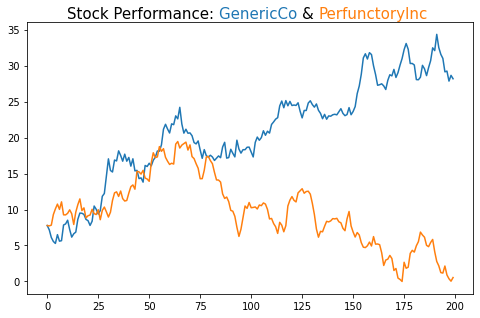

In [5]:
# Generate data
x_len = 200
x = range(0, x_len)

# Create a Gaussian random walk starting at 0
start = np.zeros(1)
y1 = np.concatenate( [start,np.random.normal(0,1,x_len-1)] ).cumsum()
y2 = np.concatenate( [start,np.random.normal(0,1,x_len-1)] ).cumsum()

minimum = np.min([y1.min(), y2.min()])
y1 = y1 - minimum # GenericCO
y2 = y2 - minimum # PerfunctoryInc


# Make the plot
fig, ax = plt.subplots(figsize = (8,5))

# Color arguments added to make defaults explicit
ax.plot(x,y1, color = 'C0')
ax.plot(x,y2, color = 'C1')

color_title(['Stock Performance: ','GenericCo ','& ','PerfunctoryInc'], 
            ['black', 'C0', 'black', 'C1'], textprops = {'size':15})

#plt.savefig('multicolor_title.png', dpi = 500)

## Example 2
### Don't use `tight_layout()` after `color_title`. 

Calling `tight_layout` after `color_title` can create awkward spacing between words. 

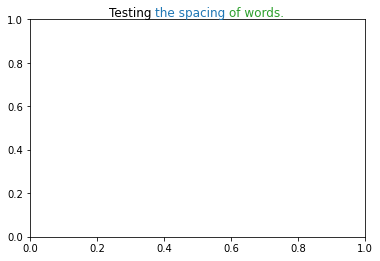

In [6]:
# Without tight_layout() the spacing is good

fig, ax = plt.subplots()

label_list = ['Testing ', 'the spacing ', 'of words.']
colors = ['black', 'C0', 'C2']
color_title(label_list, colors)

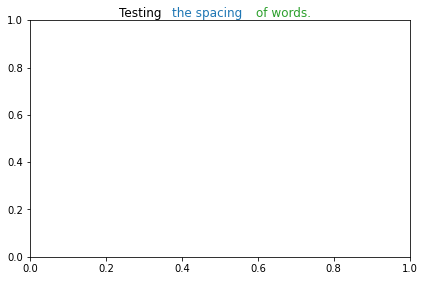

In [7]:
# With tight_layout() the spacing is bad

fig, ax = plt.subplots()

label_list = ['Testing ', 'the spacing ', 'of words.']
colors = ['black', 'C0', 'C2']
color_title(label_list, colors)

fig.tight_layout()

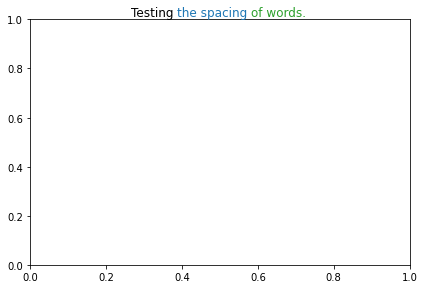

In [8]:
# Tight layout before color_title is fine.

fig, ax = plt.subplots()

label_list = ['Testing ', 'the spacing ', 'of words.']
colors = ['black', 'C0', 'C2']

fig.tight_layout()

color_title(label_list, colors)

# Compare Centering of `plt.title` with `color_title`.

The red `'Hey'` and the black `'Hey'` are placed in roughly the same position. 

Text(0.5, 1.0, 'Hey ')

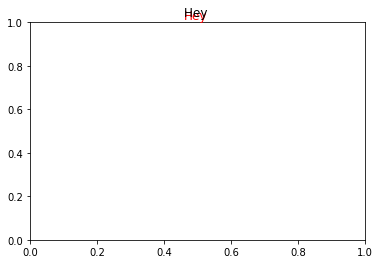

In [9]:
fig, ax = plt.subplots()

color_title(['Hey'], ['red'])
plt.title('Hey ', loc = 'center')